In [45]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 22
%matplotlib inline

In [46]:
def rolling_apply(fun, a, w):
    r = np.empty(a.shape)
    r.fill(0)
    for i in range(0, a.shape[0]):
        r[i] = fun(a[(i-w+1):i+1])
    return r

In [49]:
rewards_resnet = np.load('runs/run-resnet2/results.npy')
rewards_cnn = np.load('runs/run-cnn2/results.npy')
rewards_mlp = np.load('runs/run-mlp2/results.npy')

reward_list = [rewards_resnet, rewards_cnn, rewards_mlp]
labels = ['Resnet', 'CNN-mlp', 'MLP']

In [50]:
np.mean(rewards_resnet[9900:10000]), np.std(rewards_resnet[9900:10000])

(253.76546604351054, 48.284968593411818)

In [51]:
np.mean(rewards_cnn[-100:]), np.std(rewards_cnn[-100-1:])

(249.36046631520458, 37.82440869209249)

In [52]:
np.mean(rewards_mlp[-100:]), np.std(rewards_mlp[-100:-1])

(173.01203659163005, 64.32187021289927)

In [53]:
myopic = np.load('runs/myopic/rewards_test.npy')
myopic

array([ 278.07131269])

In [54]:
rand = np.load('runs/random/rewards_test.npy')
np.mean(rand), np.std(rand)

(92.188563069152096, 23.83609870155275)

In [55]:
means = [rolling_apply(np.mean, r, 100) for r in reward_list]
t = np.arange(means[0].shape[0])

/Users/shane/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shane/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


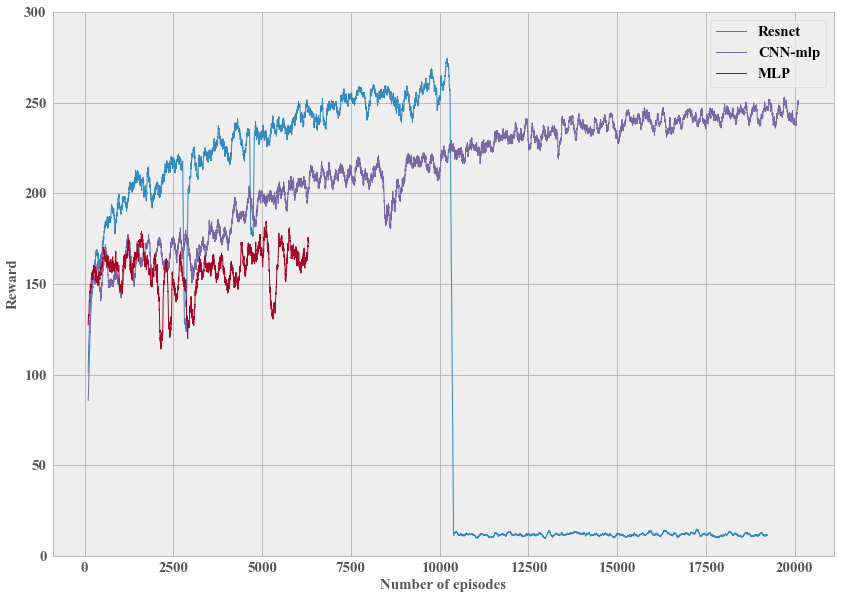

In [56]:
plt.figure(figsize=(14, 10))
ax = plt.subplot(111)
ax.set_xlabel('Number of episodes')
ax.set_ylabel('Reward')
for i in range(len(means)):
    ax.plot(np.arange(means[i].shape[0]), means[i], label=labels[i])
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.ylim(0, 300)
plt.legend(fontsize=15)
plt.savefig('../writeup/figs/learningcurve.pdf')

In [ ]:
np.min(meanz)